# 00 - Input data - Population near avenues

## __Import libraries__

In [ ]:
first_folder_path = '../../../'

In [ ]:
import os
import sys

import pandas as pd
import geopandas as gpd
import osmnx as ox
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join(first_folder_path))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

## __Notebook config__

In [ ]:
# Projected CRS to be used
projected_crs = "EPSG:6372"
# Project directory
project_dir = first_folder_path + "data/processed/2025_airquality_article/"

In [ ]:
city_dict = {'Aguascalientes':'ags',
             'Irapuato':'irp',
             'Morelia':'mrl',
             'Queretaro':'qto',
             'SLP':'slp'
            }

city_list = list(city_dict.keys())
city = list(city_dict.keys())[0]
city_abrv = list(city_dict.values())[0]

## __Load data__

In [21]:
metro_schema = 'metropolis'
metro_table = 'metro_gdf_2020'

if len(city_list) >= 2:
            city_tpl = str(tuple(city_list))
else:
    city_list.append(city_list[0])
    city_tpl = str(tuple(city_list))

metro_query = f"SELECT * FROM {metro_schema}.{metro_table} WHERE \"city\" IN {city_tpl}"
metro_gdf = aup.gdf_from_query(metro_query, geometry_col='geometry')
metro_gdf = metro_gdf.set_crs("EPSG:4326")

# Show
print(metro_gdf.crs)
print(metro_gdf.shape)
metro_gdf.head(1)

EPSG:4326
(13, 6)


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,city
0,01001,01,001,Aguascalientes,"POLYGON ((-102.10641 22.06035, -102.10368 22.0...",Aguascalientes


In [22]:
city_gdf = metro_gdf.loc[metro_gdf.city==city].copy()
city_gdf

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,city
0,01001,01,001,Aguascalientes,"POLYGON ((-102.10641 22.06035, -102.10368 22.0...",Aguascalientes
1,01005,01,005,Jesús María,"POLYGON ((-102.33568 22.05067, -102.33348 22.0...",Aguascalientes
2,01011,01,011,San Francisco de los Romo,"POLYGON ((-102.15272 22.08962, -102.15100 22.0...",Aguascalientes


In [24]:
cvegeo_mun_lst = list(city_gdf.CVEGEO.unique())

if len(cvegeo_mun_lst) >= 2:
    cvegeo_mun_tpl = str(tuple(cvegeo_mun_lst))
else:
    cvegeo_mun_lst.append(cvegeo_mun_lst[0])
    cvegeo_mun_tpl = str(tuple(cvegeo_mun_lst))

cvegeo_mun_tpl

"('01001', '01005', '01011')"

In [ ]:
censo_schema = 'raster_analysis'
censo_folder = 'ndvi_analysis_hex'

block_query = f"SELECT * FROM sociodemografico.censo_inegi_20_mza WHERE \"cvegeo_mun\" IN {cvegeo_mun_tpl}"
pop_block_gdf = aup.gdf_from_query(block_query, geometry_col='geometry')

if pop_block_gdf.crs != projected_crs:
    pop_block_gdf = pop_block_gdf.to_crs(projected_crs)

# Show
print(pop_block_gdf.crs)
print(pop_block_gdf.shape)
pop_block_gdf.head(2)

In [ ]:
pop_block_gdf

In [15]:
city_buffer_gdf = gpd.read_file(project_dir+f"bufferdiss_{city_abrv}_6372.gpkg")

# Show
print(city_buffer_gdf.crs)
print(city_buffer_gdf.shape)
city_buffer_gdf.head(1)

EPSG:6372
(1, 16)


,Node_Count,Label,Id,Layer,Integratio,Integrati1,Node_Coun1,Choice_R3,Connectivi,Choice,Choice_R4,Weight,Integrati2,BUFF_DIST,ORIG_FID,geometry
0,5412.0,None,32000.0,Aguascalientes,5.049431,4.089458,8141.0,352693.0,205.0,21136806.0,2043269.0,0.0,6.184775,500.0,0,"MULTIPOLYGON (((2472010.354 1078181.747, 24720..."


<Axes: >

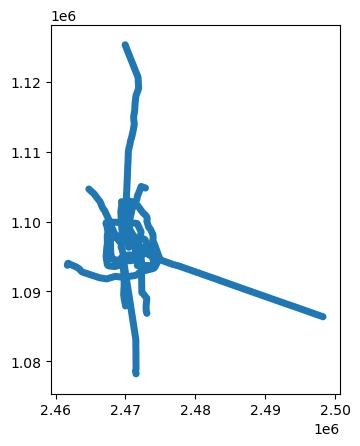

In [16]:
city_buffer_gdf.plot()

In [ ]:
metro_gdf = 